# The Sparks Foundation

# Data Science and Business Analytics (GRIP January 2022)

# Task 1: Prediction using Supervised ML

# Author : Archana Jamini


### Statement: What will be the predicted score if the student studied for 9.25hrs/day?


#### THEORY:

###### SUPERVISED LEARNING : Supervised learning is one of the most used methods in ML, takes both training data (also called data samples) and its associated output (also called labels or responses) during the training process. The major goal of supervised learning methods is to learn the association between input training data and their labels.

###### REGRESSION : Regression analysis is form of predictive modelling technique which investigates the relationship between dependant and independant variable.

###### LINEAR REGRESSION : Linear regression is used to predict the relationship between two variables by applying a linear equation to observed data. There are two types of variable, one variable is called an independent variable, and the other is a dependent variable. Linear regression is commonly used for predictive analysis. 


#### Importing all required libraries

In [1]:
#importing datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

In [2]:
## Reading the dataset
url = 'http://bit.ly/w-data'
st_data = pd.read_csv(url)

st_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### Checking data

In [5]:
st_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
st_data.describe(include='all')

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


###### So data has no null values as we can see using info and describe method

In [9]:
## Declare variables
x= st_data['Hours']
y= st_data['Scores']


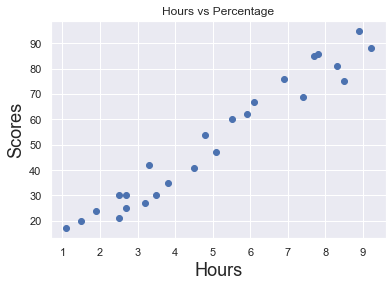

In [10]:
## From a scatter plot between Hours and Scores
plt.scatter(x, y)
plt.title('Hours vs Percentage')
plt.xlabel('Hours', fontsize=18)
plt.ylabel('Scores', fontsize=18)
plt.show()

##### we can see from the graph that there is a linear relationship between study hours and scores
##### means there is linearity in data and there is no other feature, so we can perform linear regression

In [11]:
## Reshape x and y with reshape method
X = x.values.reshape(-1,1)
Y = y.values.reshape(-1,1)

##### Spliting dataset into training and testing data


In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=69)


##### Performing regression

In [13]:
st_reg = LinearRegression()
st_reg.fit(x_train, y_train)
print('Model Training Completed')

Model Training Completed


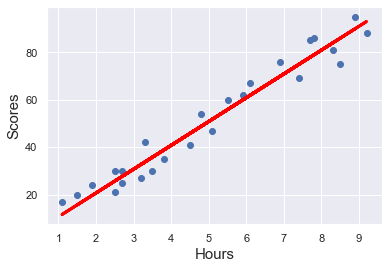

In [14]:
y_hat = st_reg.coef_*X + st_reg.intercept_

plt.scatter(X,Y)
plt.plot(X,y_hat, c='red', lw=3)
plt.xlabel('Hours', fontsize=15)
plt.ylabel('Scores', fontsize=15)
plt.show()

##### visually we can see that regression line is fitting the data quite well

##### #Predicting values with model and comparing with actual values

In [15]:
y_predict = st_reg.predict(x_test)

In [16]:
df = pd.DataFrame(y_test, columns = ['Actual Score'])
df

,Actual Score
0,69
1,67
2,30
3,54
4,17


In [17]:
df['Predicted score'] = y_predict
df

,Actual Score,Predicted score
0,69,74.905761
1,67,61.844106
2,30,25.673372
3,54,48.782452
4,17,11.606975


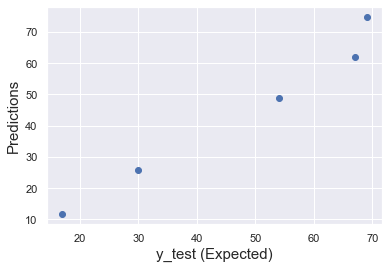

In [18]:
## Ploting test scores against predicted score
plt.scatter(y_test,y_predict)
plt.xlabel('y_test (Expected)', size=15)
plt.ylabel('Predictions', size=15)
plt.show()

##### Predicting value of Given 9.25 hours study time

In [19]:

hours = [[9.25, ]]
own_pred = st_reg.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))


No of Hours = [[9.25]]
Predicted Score = [93.49349906]


##### Evaluating model

In [20]:
## Calculating Root mean squared error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)

print('Mean square error: ', mse)
print('Root mean square error: ', rmse)


Mean square error:  27.297695382292638
Root mean square error:  5.224719646286548


In [21]:
## Calculating Mean absolute error
from sklearn.metrics import mean_absolute_error  
mae = mean_absolute_error(y_test, y_predict)
print('Mean absolute error: ', mae)


Mean absolute error:  5.19977093449048


In [22]:
## Calculating R-squared
r2 = st_reg.score(x_train, y_train)
print('R-squared: ', r2)


R-squared:  0.953896720241372


In [24]:
## Calculating adjt. R-squared
n = x_train.shape[0]
p = x_train.shape[1]
adjust_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print('Adjusted R-squared: ',adjust_r2)


Adjusted R-squared:  0.9513354269214481
